In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [95]:
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='cp1252')
data.head()

F:\Programs\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [96]:
data.info()
list(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [97]:
data.rename(columns={'iyear':'Year', 'country_txt':'Country', 'provstate':'City',
                     'attacktype1_txt':'AttackType', 'nkill':'Killed', 'nwound':'Wounded',
                     'gname':'Group', 'targtype1_txt':'Target_type', 'weaptype1_txt':'Weapon_type',
                     'success':'Success'},
                     inplace=True)

data['Killed'] = data['Killed'].fillna(0)
data['Wounded'] = data['Wounded'].fillna(0)
data['Casualties'] = data['Killed'] + data['Wounded']

data = data[['Year', 'Country', 'City', 'AttackType', 'Casualties',
             'Group', 'Target_type','Weapon_type', 'Success']]
data

,Year,Country,City,AttackType,Casualties,Group,Target_type,Weapon_type,Success
0,1970,Dominican Republic,NaN,Assassination,1.0,MANO-D,Private Citizens & Property,Unknown,1
1,1970,Mexico,Federal,Hostage Taking (Kidnapping),0.0,23rd of September Communist League,Government (Diplomatic),Unknown,1
2,1970,Philippines,Tarlac,Assassination,1.0,Unknown,Journalists & Media,Unknown,1
3,1970,Greece,Attica,Bombing/Explosion,0.0,Unknown,Government (Diplomatic),Explosives,1
4,1970,Japan,Fukouka,Facility/Infrastructure Attack,0.0,Unknown,Government (Diplomatic),Incendiary,1
...,...,...,...,...,...,...,...,...,...
181686,2017,Somalia,Middle Shebelle,Armed Assault,3.0,Al-Shabaab,Military,Firearms,1
181687,2017,Syria,Lattakia,Bombing/Explosion,9.0,Muslim extremists,Military,Explosives,1
181688,2017,Philippines,Maguindanao,Facility/Infrastructure Attack,0.0,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,1
181689,2017,India,Manipur,Bombing/Explosion,0.0,Unknown,Government (General),Explosives,0


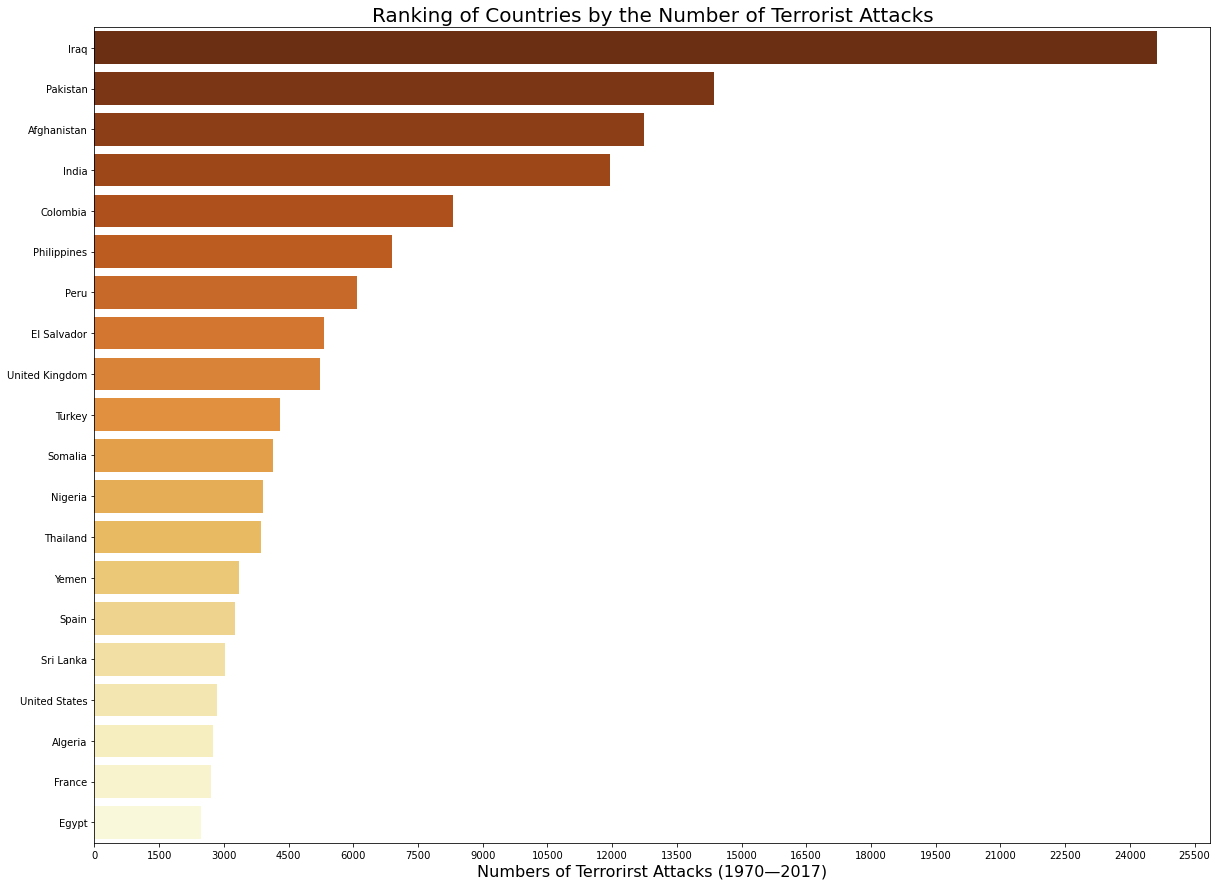

In [79]:
world = data.Country.value_counts()[:20]
plt.figure(figsize=(20,15))
ax = sns.barplot(x=world,y=world.index, palette='YlOrBr_r')
plt.title('Ranking of Countries by the Number of Terrorist Attacks', fontsize=20)
plt.xlabel('Numbers of Terrorirst Attacks (1970—2017)', fontsize=16)
plt.xticks(np.arange(0,26000,1500))
plt.show()

In [80]:
data.groupby('Country')['Casualties'].sum().sort_values(ascending=False)[:20]

Country
Iraq             213279.0
Afghanistan       83661.0
Pakistan          65860.0
India             48321.0
Nigeria           32921.0
Sri Lanka         31091.0
Syria             29338.0
Colombia          25026.0
United States     24473.0
Philippines       22926.0
Algeria           20216.0
Somalia           19148.0
Yemen             18104.0
El Salvador       17115.0
Peru              16849.0
Turkey            16787.0
Lebanon           14965.0
Nicaragua         12329.0
Russia            11749.0
Thailand          10560.0
Name: Casualties, dtype: float64

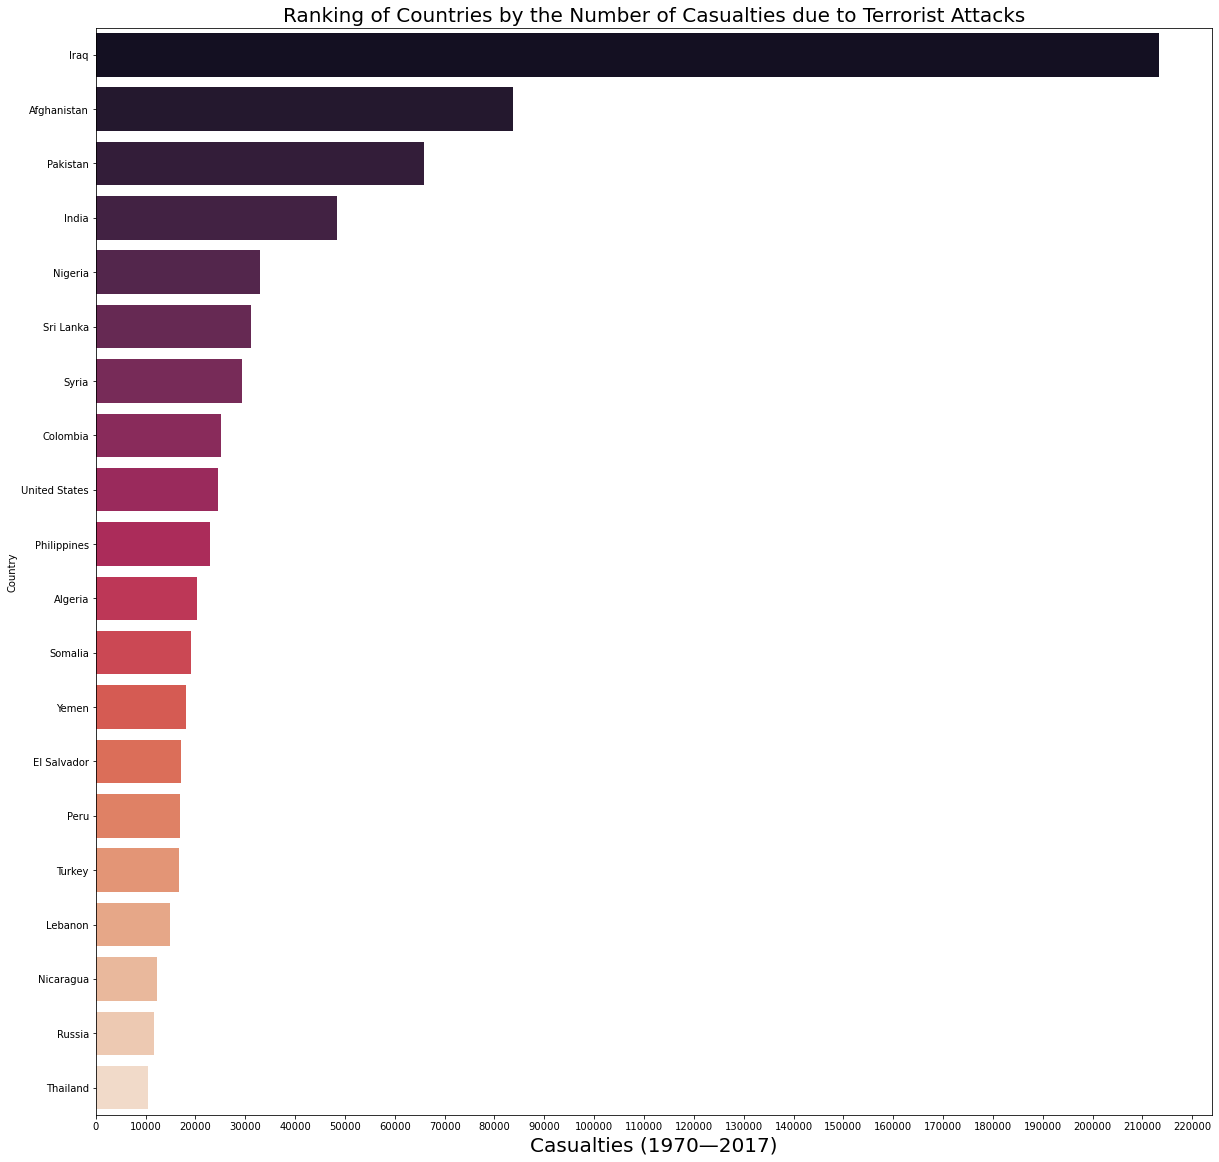

In [81]:
cas = data.groupby('Country')['Casualties'].sum().sort_values(ascending=False)[:20]
plt.figure(figsize=(20,20))
ax = sns.barplot(x=cas,y=cas.index, palette='rocket')
plt.title('Ranking of Countries by the Number of Casualties due to Terrorist Attacks', fontsize=20)
plt.xlabel('Casualties (1970—2017)', fontsize=20)
plt.xticks(np.arange(0,230000,10000))
plt.show()

In [98]:
t_data = data[data.Country == 'Turkey']
t_data

,Year,Country,City,AttackType,Casualties,Group,Target_type,Weapon_type,Success
226,1970,Turkey,Istanbul,Bombing/Explosion,0.0,Palestinians,Airports & Aircraft,Explosives,1
486,1970,Turkey,Ankara,Bombing/Explosion,0.0,Turkish People's Liberation Army,Military,Explosives,1
531,1970,Turkey,Izmir,Bombing/Explosion,0.0,Turkish People's Liberation Front (TPLF)(THKP-C),Military,Explosives,1
534,1970,Turkey,Ankara,Bombing/Explosion,0.0,Unknown,Government (Diplomatic),Explosives,1
535,1970,Turkey,Ankara,Bombing/Explosion,0.0,Turkish People's Liberation Army,Business,Explosives,1
...,...,...,...,...,...,...,...,...,...
181486,2017,Turkey,Hakkari,Armed Assault,4.0,Kurdistan Workers' Party (PKK),Military,Firearms,0
181529,2017,Turkey,Hakkari,Unknown,3.0,Kurdistan Workers' Party (PKK),Military,Unknown,1
181607,2017,Turkey,Adana,Bombing/Explosion,0.0,Unknown,Police,Explosives,1
181610,2017,Turkey,Hakkari,Bombing/Explosion,3.0,Kurdistan Workers' Party (PKK),Military,Explosives,1


<AxesSubplot:>

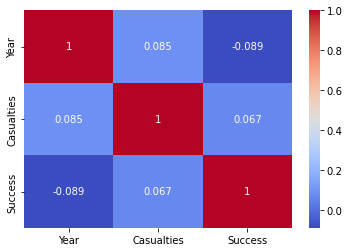

In [10]:
sns.set_style()
sns.heatmap(t_data.corr(), annot=True, cmap ='coolwarm')

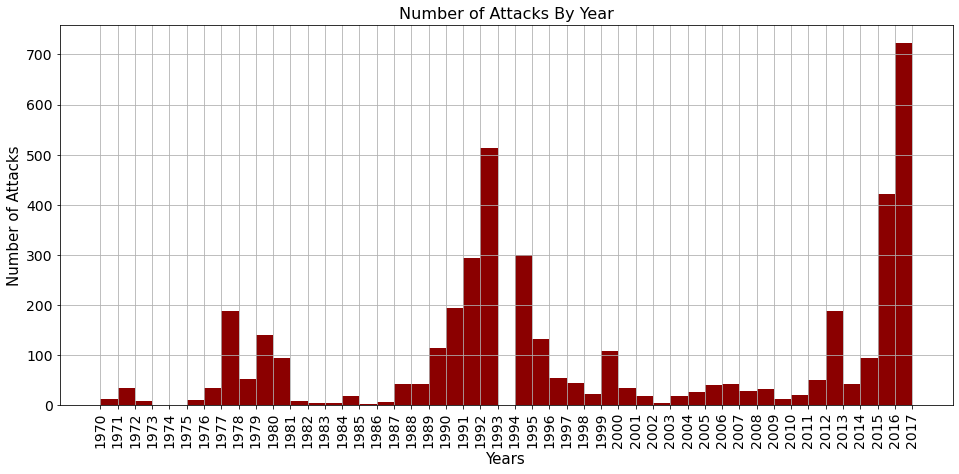

In [11]:
t_data.Year.plot(kind = 'hist', color = 'darkred', bins=range(1970, 2018), figsize=(16,7), grid=True)
plt.xticks(range(1970, 2018), rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Years", fontsize=15)
plt.ylabel("Number of Attacks", fontsize=15)
plt.title("Number of Attacks By Year", fontsize=16)
plt.show()

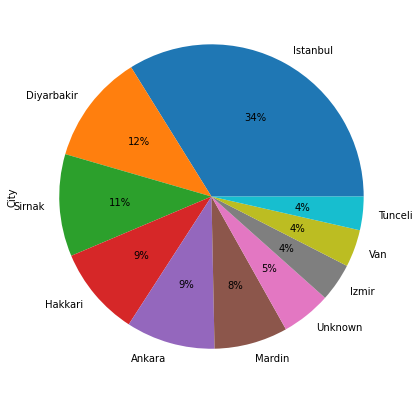

In [12]:
plt.figure(figsize=(10, 7))
colors = sns.color_palette('tab10')
t_data.City.value_counts().head(10).plot.pie(colors = colors, autopct='%.0f%%')
plt.show()

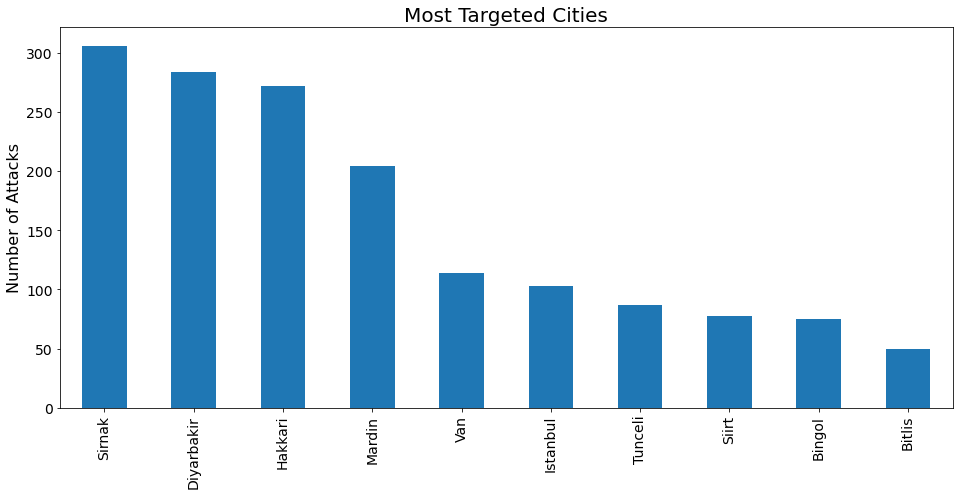

In [13]:
pkk = data[data.Group == "Kurdistan Workers' Party (PKK)"]
pkk.City.value_counts().drop("Unknown").head(10).plot.bar(figsize=[16,7])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Number of Attacks", fontsize=16)
plt.title("Most Targeted Cities", fontsize=20)
plt.show()

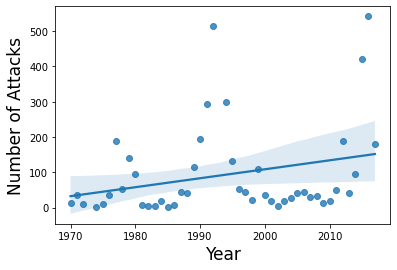

In [99]:
a = t_data.Year.unique() 
b = t_data.Year.value_counts().sort_values(ascending=True).loc[t_data.Year.unique()] 
sns.regplot(x = a, y = b)
plt.xlabel('Year', fontsize=17) 
plt.ylabel('Number of Attacks', fontsize=17) 
plt.show()